# AutoEncoder

reference: [Learning Internal Representations by Error Propagation](https://stanford.edu/~jlmcc/papers/PDP/Volume%201/Chap8_PDP86.pdf)




## AutoEncoder란?

입력과 출력이 같은 구조. <br>
label이 입력 데이터가 되는 구조로 **unsupervised learning** 방법 중 하나. <br>
정보를 압축하는 encoder 파트와 압축된 정보를 복원하는 decoder 파트로 구성. <br>
중간에는 latent vector가 존재하여 인코더를 통해 압축된 정보를 가지고 있음. <br>

![](https://velog.velcdn.com/images/hyeda/post/cef78295-1a18-43c9-9cb6-90a89a7673cf/image.png)

### Encoder

정보를 압축하기 위한 파트 <br>
입력 데이터를 받아서 이를 낮은 차원의 공간으로 매핑. 이 과정에서 중요한 특징들만 추출하여 잠재 벡터를 생성 <br>
일반적으로는 여러 layer를 stack하여 사용 <br>
layer가 많아질수록 사용하는 nueron의 개수는 줄이는 게 일반적 (undercomplete autoencoder) <br>
&nbsp;&nbsp;&nbsp;&nbsp;-> 입력 데이터의 정보를 압축하기 위함 <br>
Decoder와 대칭 구조를 가짐 <br>

### Latent Vector

bottleneck hiddenlayer, hidden representation, feature 등으로도 불림 <br>
입력 데이터의 중요한 정보가 압축된 형태로 원래 데이터보다 낮은 차원을 가짐. <br>
데이터의 핵심적인 특성을 표현 <br>
이후 디코더에서 사용 <br>

### Decoder

정보를 복원하기 위한 파트 <br>
일반적으로는 여러 layer를 stack하여 사용 <br>
layer가 많아질수록 사용하는 nueron의 개수는 증가하는 게 일반적 <br>
Eecoder와 대칭 구조를 가짐 <br>

## AutoEncoder의 활용

- Dimentionality Reduction
    - latent vector의 dimension을 input dim보다 낮게 설정하여 데이터를 저차원으로 매핑할 수 있음
- Anomaly Detection
    - latent vector를 통하여 정상과 비정상을 구분
- Denosing
    - 원본 이미지에서 정보를 압축했다 다시 복원하는 과정을 통해 불필요한 정보를 제거
- Representation Learning
    - 데이터의 주요 특징을 포착하여 벡터화
- Manifold Learning
    - 고차원 공간의 데이터를 가장 잘 표현할 수 있는 저차원 공간에 매핑

### 사용 방법

> ```python
> import torch.nn as nn
> 
> class Autoencoder(nn.Module):
>     def __init__(self, latent_dim):
>         self.latent_dim = latent_dim
>         super().__init__()
>         # 인코더
>         self.encoder = nn.Sequential(
>             nn.Linear(784, 128),            # 입력층
>             nn.ReLU(),
>             nn.Linear(128, 64),             # 중간층
>             nn.ReLU(),
>             nn.Linear(64, latent_dim)       # 잠재 벡터
>         )
>         # 디코더
>         self.decoder = nn.Sequential(
>             nn.Linear(latent_dim, 64),      # 잠재 벡터 입력
>             nn.ReLU(),
>             nn.Linear(64, 128),             # 중간층
>             nn.ReLU(),
>             nn.Linear(128, 784),            # 출력층
>         )
> 
>     def forward(self, x):
>         latent_vector = self.encoder(x)
>         x_reconstructed = self.decoder(latent_vector)
>         
>         return x_reconstructed
> ```

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim, dropout_ratio: float =0.5):
        super().__init__()
        self.input_dim =input_dim
        self.latent_dim = latent_dim
        self.dropout_ratio = dropout_ratio

        self.linear1 = nn.Linear(self.input_dim, 500)
        self.batch_norml1 = nn.BatchNorm1d(500)
        self.leaky_relu1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(self.dropout_ratio)

        self.linear2 = nn.Linear(500, 300)
        self.batch_norml2 = nn.BatchNorm1d(300)
        self.leaky_relu2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(self.dropout_ratio)

        self.output = nn.Linear(300, self.latent_dim)

    def forward(self, x):
        x = self.linear1(x) 
        x = self.batch_norml1(x)
        x = self.leaky_relu1(x)
        x = self.dropout1(x)

        x = self.linear2(x) 
        x = self.batch_norml2(x) 
        x = self.leaky_relu2(x)
        x = self.dropout2(x)

        x = self.output(x)

        return x 

    



In [3]:
encoder = Encoder(784, 2)
encoder

Encoder(
  (linear1): Linear(in_features=784, out_features=500, bias=True)
  (batch_norml1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leaky_relu1): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.5, inplace=False)
  (linear2): Linear(in_features=500, out_features=300, bias=True)
  (batch_norml2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leaky_relu2): LeakyReLU(negative_slope=0.01)
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=300, out_features=2, bias=True)
)

In [4]:
x = torch.randn(32, 28*28)
latent_vector = encoder(x)
latent_vector.shape

torch.Size([32, 2])

In [5]:
class Encoder(nn.Module):
    def __init__(
            self, 
            input_dim, 
            latent_dim, 
            dropout_ratio: float =0.5
        ):
        super().__init__()
        self.input_dim =input_dim
        self.latent_dim = latent_dim
        self.dropout_ratio = dropout_ratio

        self.layer1 = nn.Sequential(
            nn.Linear(self.input_dim, 500),
            nn.BatchNorm1d(500),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(500, 300),
            nn.BatchNorm1d(300),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.output = nn.Linear(300, self.latent_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x) 

        x = self.output(x)

        return x 


In [6]:
encoder = Encoder(784, 2)
encoder

Encoder(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (output): Linear(in_features=300, out_features=2, bias=True)
)

In [8]:
x = torch.randn(32, 28*28)
latent_vector = encoder(x)
latent_vector.shape

torch.Size([32, 2])

In [9]:
class Decoder(nn.Module):
    def __init__(self, input_dim, latent_dim, dropout_ratio: float =0.5):
        super().__init__()
        self.latent_dim = latent_dim
        self.input_dim = input_dim
        self.dropout_ratio = dropout_ratio

        self.layer1 = nn.Sequential(
            nn.Linear(self.latent_dim, 300),
            nn.BatchNorm1d(300),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(300, 500),
            nn.BatchNorm1d(500),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.output = nn.Linear(500, self.input_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x) 

        x = self.output(x)

        return x 

In [11]:
decoder = Decoder(2, 784)
decoder

Decoder(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (output): Linear(in_features=500, out_features=2, bias=True)
)

In [13]:
output = decoder(latent_vector)
output.shape

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2 and 784x300)

In [15]:
class AutoEncoder_(nn.Module):
    def __init__(self, input_dim, latent_dim, dropout_ratio: float=0.5):
        super().__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.dropout_ratio = dropout_ratio

        self.layer1 = nn.Sequential(
            nn.Linear(self.input_dim, 500),
            nn.BatchNorm1d(500),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(500, 300),
            nn.BatchNorm1d(300),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.latent = nn.Linear(300, self.latent_dim)

        self.layer3 = nn.Sequential(
            nn.Linear(self.latent_dim, 300),
            nn.BatchNorm1d(300),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.layer4 = nn.Sequential(
            nn.Linear(300, 500),
            nn.BatchNorm1d(500),
            nn.LeakyReLU(),
            nn.Dropout(self.dropout_ratio)
        )

        self.output = nn.Linear(500, self.input_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x) 

        x = self.latent(x)

        x = self.layer3(x)
        x = self.layer4(x)

        x = self.output(x) 

        return x 

In [16]:
autoencoder = AutoEncoder_(784, 2)
autoencoder

AutoEncoder_(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=500, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (latent): Linear(in_features=300, out_features=2, bias=True)
  (layer3): Sequential(
    (0): Linear(in_features=2, out_features=300, bias=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=300, out_features=500, bias=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True

In [17]:
x = torch.randn(32, 28*28)
output = autoencoder(x)
output.shape

torch.Size([32, 784])

In [18]:
class AutoEncoder(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        latent_vector = self.encoder(x)
        x_reconstructed = self.decoder(latent_vector)

        return x_reconstructed, latent_vector

In [19]:
auto_encoder = AutoEncoder(encoder, decoder)
x_reconstructed, latent_vector = auto_encoder(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2 and 784x300)

In [20]:
x_reconstructed.shape

NameError: name 'x_reconstructed' is not defined

In [22]:
loss = F.mse_loss(x_reconstructed, x)

NameError: name 'x_reconstructed' is not defined

In [23]:
loss

NameError: name 'loss' is not defined

In [24]:
from src.training import MNISTModule
from src.data import MNISTDataset, MNISTDataModule
from src.model.auto_encoder import Encoder, Decoder, AutoEncoder

import json

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as ds
import torchvision.transforms as transforms

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'MNISTModule' from 'src.training' (c:\Users\USER\Desktop\qwer\day32_LSTM_GRU\src\training.py)

In [79]:
## Load Checkpoint

with open('./configs.json', 'r') as file:
    configs = json.load(file)


train = ds.MNIST(
    root='data/mnist',
    train=True,
    transform=transforms.ToTensor(), # TOTensor가 0과 1사이로 바꿔줌
    download=True,
)

test = ds.MNIST(
    root='data/mnist',
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

# 데이터셋 학습용과 valid로 분할
train, valid = train_test_split(
    train,
    test_size=0.2, 
    random_state = configs.get('seed')
)

# 데이터셋 객체로 변환
train_dataset = MNISTDataset(train)
valid_dataset = MNISTDataset(valid)
test_dataset = MNISTDataset(test)

# 데이터 모듈 생성 및 데이터 준비
mnist_data_module = MNISTDataModule(batch_size=configs.get('batch_size'))
mnist_data_module.prepare(train_dataset, valid_dataset, test_dataset)

# 모델 생성
configs.update({
    'input_dim': train[0][0].shape[1]**2
    })

encoder = Encoder(configs.get('input_dim'), 2)
decoder = Decoder(configs.get('input_dim'), 2)
model = AutoEncoder(encoder, decoder)

# LightningModule 인스턴스 생성
mnist_module = MNISTModule(
    model= model,
    learning_rate=configs.get('learning_rate'),
)

In [80]:
model = MNISTModule.load_from_checkpoint(r'C:\Users\USER\Desktop\qwer\day33\tensorboard\MNIST\batch_size=256,learning_rate=0.001,output_dim=2,dropout_ratio=0.5,device=cpu,input_dim=784\version_5\checkpoints\epoch=61-step=11594.ckpt', model= model,
    learning_rate=configs.get('learning_rate'),)

In [81]:
model

MNISTModule(
  (model): AutoEncoder(
    (encoder): Encoder(
      (layer1): Sequential(
        (0): Linear(in_features=784, out_features=500, bias=True)
        (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
      )
      (layer2): Sequential(
        (0): Linear(in_features=500, out_features=300, bias=True)
        (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
      )
      (output): Linear(in_features=300, out_features=2, bias=True)
    )
    (decoder): Decoder(
      (layer1): Sequential(
        (0): Linear(in_features=2, out_features=300, bias=True)
        (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
        (3): Dropout(p=0.5, inplace=False)
   

In [85]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train_dataset,
    batch_size = configs.get('batch_size'),
)

In [109]:
model.eval()

latent_vectors = []
labels = []
for train_dataloader_ in train_dataloader:
    x_reconstructed, latent_vector = model.model(
        train_dataloader_.get('X').flatten(start_dim =1)
    )
    latent_vectors.append(latent_vector)
    labels.append(train_dataloader_.get('y').detach())

In [110]:
latent_vectors = torch.cat(latent_vectors)
labels = torch.cat(labels)

In [111]:
result = pd.DataFrame(latent_vectors.detach(), columns=['A1', 'A2'])
result['label'] = labels
result.label = result.label.astype(str)

px.scatter(
    result,
    x ='A1',
    y = 'A2',
    color='label'
)

In [112]:
x_reconstructed[0].shape

torch.Size([784])

In [99]:

result = pd.DataFrame(latent_vector.detach(), columns=['A1', 'A2'])
result['label'] = list(train_dataloader)[0].get('y').detach()
result.label = result.label.astype(str)

px.scatter(
    result,
    x ='A1',
    y = 'A2',
    color='label'
)

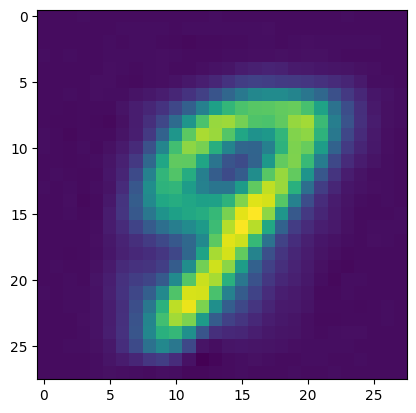

In [115]:
plt.imshow(x_reconstructed[2].reshape(28, -1).detach())

In [118]:
## Load Checkpoint

with open('./configs.json', 'r') as file:
    configs = json.load(file)


train = ds.MNIST(
    root='data/mnist',
    train=True,
    transform=transforms.ToTensor(), # TOTensor가 0과 1사이로 바꿔줌
    download=True,
)

test = ds.MNIST(
    root='data/mnist',
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

# 데이터셋 학습용과 valid로 분할
train, valid = train_test_split(
    train,
    test_size=0.2, 
    random_state = configs.get('seed')
)

# 데이터셋 객체로 변환
train_dataset = MNISTDataset(train)
valid_dataset = MNISTDataset(valid)
test_dataset = MNISTDataset(test)

# 데이터 모듈 생성 및 데이터 준비
mnist_data_module = MNISTDataModule(batch_size=configs.get('batch_size'))
mnist_data_module.prepare(train_dataset, valid_dataset, test_dataset)

# 모델 생성
configs.update({
    'input_dim': train[0][0].shape[1]**2
    })

encoder = Encoder(configs.get('input_dim'), 5)
decoder = Decoder(configs.get('input_dim'), 5)
model = AutoEncoder(encoder, decoder)

# LightningModule 인스턴스 생성
mnist_module = MNISTModule(
    model= model,
    learning_rate=configs.get('learning_rate'),
)

In [119]:
## Anomaly

model = MNISTModule.load_from_checkpoint(r'C:\Users\USER\Desktop\qwer\day33\tensorboard\MNIST\batch_size=256,learning_rate=0.001,output_dim=2,dropout_ratio=0.5,device=cpu,input_dim=784\version_7\checkpoints\epoch=60-step=1220.ckpt', model= model,
    learning_rate=configs.get('learning_rate'),)

In [121]:

train_dataloader = DataLoader(
    train_dataset,
    batch_size = configs.get('batch_size'),
)

model.eval()

latent_vectors = []
labels = []
for train_dataloader_ in train_dataloader:
    x_reconstructed, latent_vector = model.model(
        train_dataloader_.get('X').flatten(start_dim =1)
    )
    latent_vectors.append(latent_vector)
    labels.append(train_dataloader_.get('y').detach())

In [129]:
train_dataloader_.get('X')[idx][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

label: 2
loss:69.39556121826172


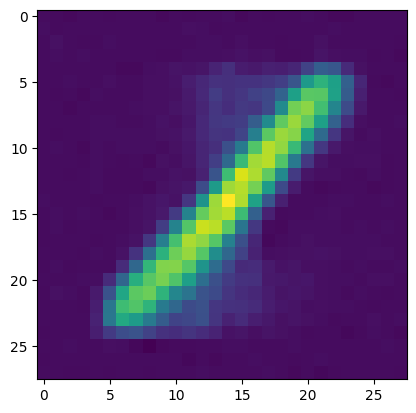

In [133]:
idx = 0
print(f'label: {train_dataloader_.get("y")[idx]}')
original = train_dataloader_.get('X')[idx][0]
reconstructed = x_reconstructed[idx].reshape(28, -1).detach()
loss = ((original - reconstructed)**2).sum()
print(f'loss:{loss}')
plt.imshow(x_reconstructed[idx].reshape(28, -1).detach())

In [134]:
losses = []
labels = []
for idx in range(128):
    original = train_dataloader_.get('X')[idx][0]
    label = train_dataloader_.get('y')[idx]

    reconstructed = x_reconstructed[idx].reshape(28, -1).detach()
    loss = ((original - reconstructed)**2).sum()

    losses.append(loss.item())
    labels.append(label.item())

In [137]:
(np.where(np.array(losses) < 10, 0, 1) == np.where(np.array(labels) == 1, 0, 1)).mean()

np.float64(0.9921875)